In [2]:
#!apt install libcurl3
#!pip install fiftyone
#!pip install fiftyone-db-ubuntu1604

In [1]:
import fiftyone as fo
import os
import cv2
import numpy

In [4]:
file = 'cv_val5'

classes = ['Backgroud',
 'General trash',
 'Paper',
 'Paper pack',
 'Metal',
 'Glass',
 'Plastic',
 'Styrofoam',
 'Plastic bag',
 'Battery',
 'Clothing']

mask_label = {label:name for label,name in enumerate(classes)}

data_root = "/opt/ml/segmentation/moon/dataset/"
dataset = fo.Dataset.from_images_dir(data_root+f'images/{file}/')
dataset.default_mask_targets = mask_label

data_root = "/opt/ml/segmentation/moon/dataset/"
predictions_view = dataset.limit(len(dataset))

# Add predictions to samples
with fo.ProgressBar() as pb:
    for idx,sample in enumerate(pb(predictions_view)):
        file_name = sample['filepath'].split('/')[-1]
        file_name = os.path.splitext(file_name)[0]+'.png'
        ann_path = os.path.join(data_root,f'annotations/{file}',file_name)

        mask = cv2.imread(ann_path)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        mask = mask[:,:,0]
        sample['segmentation'] = fo.Segmentation(mask=mask)
        sample.save()

 100% |█████████████████| 645/645 [139.9ms elapsed, 0s remaining, 4.6K samples/s]     
 100% |█████████████████| 645/645 [8.3s elapsed, 0s remaining, 81.8 samples/s]      



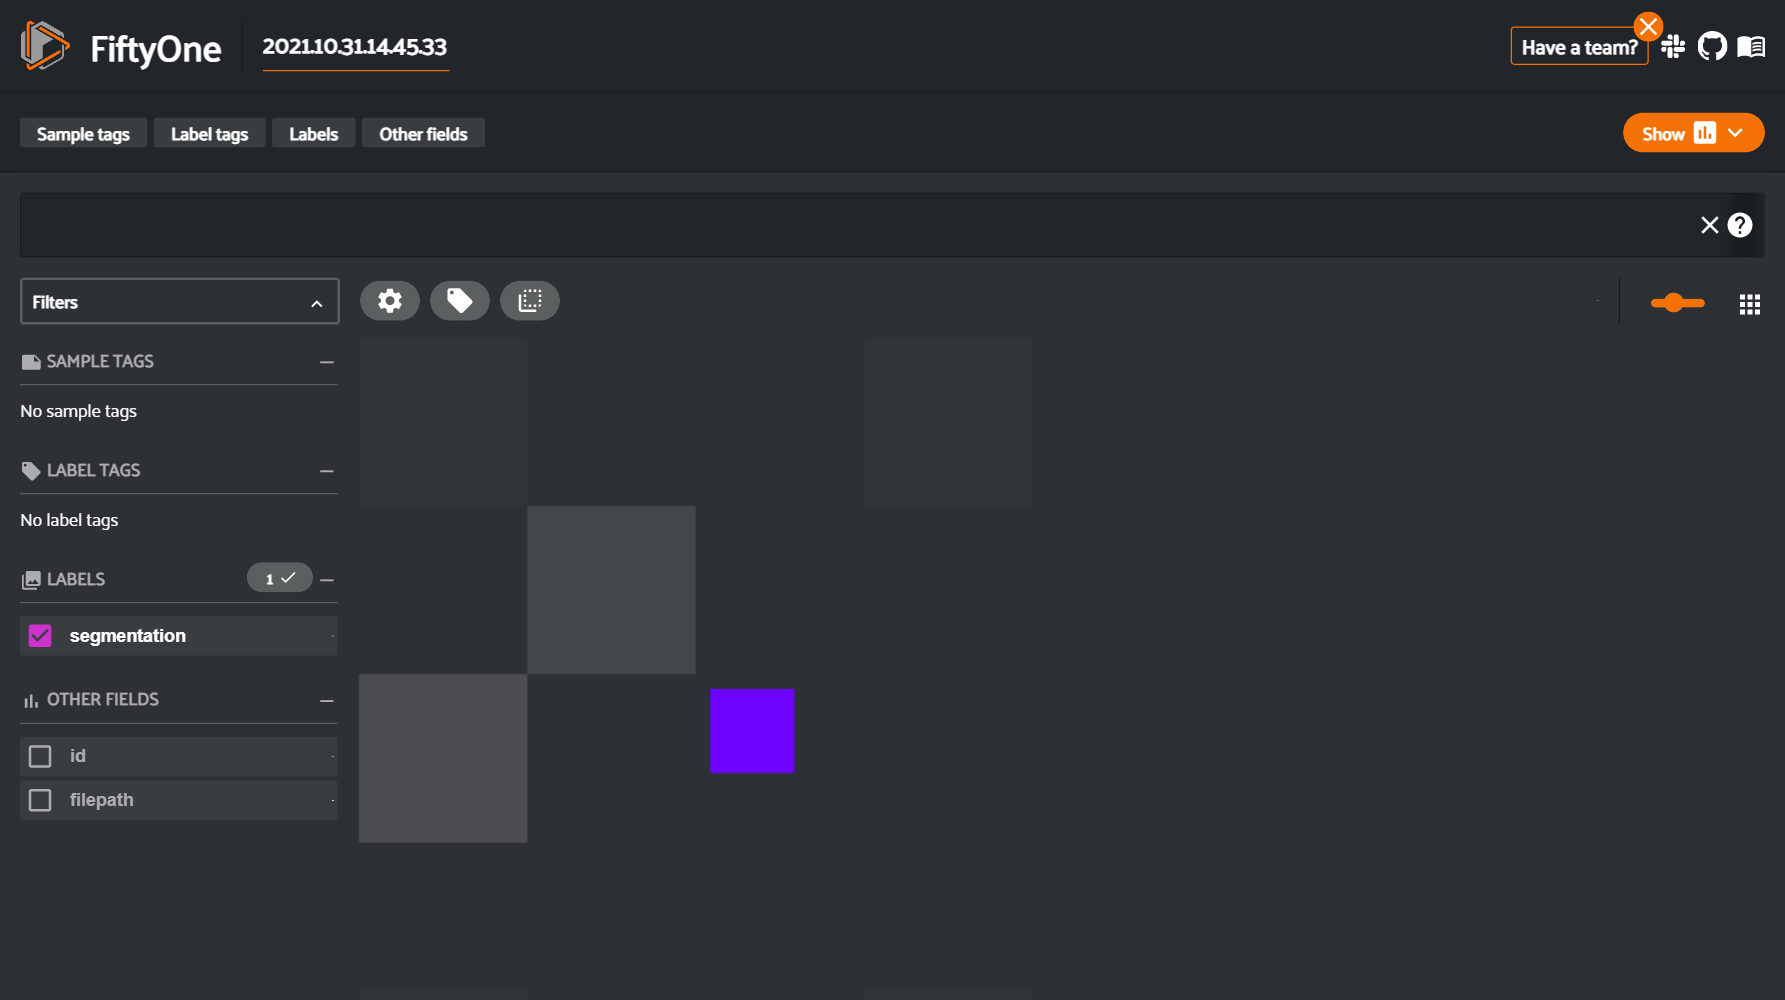

In [5]:
session = fo.launch_app(dataset)
session.view = predictions_view